## Project Description:
This project aims to build a machine learning model that can accurately detect fraudulent transactions in credit card data. The dataset consists of anonymized transaction records, and the primary goal is to identify fraudulent transactions while minimizing false positives. 

## Objectives:
- To preprocess the credit card transaction dataset by handling missing values and class imbalances.
- To visualize key data distributions to understand patterns in transactions.
- To train and evaluate multiple machine learning models for fraud detection.
- To select the best-performing model based on relevant evaluation metrics.

## Dataset:
- **Source**: Kaggle (Nelgiriye Withana - Credit Card Fraud Detection Dataset 2023)
- **Link**: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023
- **Features**: 
  - `Class`: Target variable (0 = Non-fraudulent, 1 = Fraudulent)
  - `Amount`: Transaction amount
  - `V1` to `V28`: Anonymized features derived from PCA to protect sensitive information
- **Size**: The dataset contains thousands of records, with a significant class imbalance between fraudulent and non-fraudulent transactions.

## Methodology:
1. **Data Acquisition**:
   - Download the dataset using the Kaggle API and load it into a Pandas DataFrame.

2. **Exploratory Data Analysis (EDA)**:
   - Check for missing values and duplicates.
   - Visualize class distribution and transaction amounts to identify patterns and imbalances.
   - Analyze PCA components to understand feature distributions.

3. **Data Preprocessing**:
   - Handle class imbalance using SMOTE to oversample the minority class (fraudulent transactions).
   - Scale features using StandardScaler to ensure uniform contribution in model training.

4. **Model Training and Evaluation**:
   - Split the dataset into training and testing sets.
   - Train multiple models: Logistic Regression, Random Forest, and Gradient Boosting.
   - Evaluate each model using confusion matrices and classification reports, focusing on precision, recall, and F1-score.

5. **Model Comparison**:
   - Compare model performance based on evaluation metrics and select the best-performing model for deployment.

## Tools and Technologies:
- **Programming Language**: Python
- **Libraries**: 
  - Pandas for data manipulation
  - Seaborn and Matplotlib for data visualization
  - Scikit-learn for machine learning
  - Imbalanced-learn for handling class imbalance with SMOTE

In [2]:
import kagglehub
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/credit-card-fraud-detection-dataset-2023")

print("Path to dataset files:", path)

Path to dataset files: /Users/halimahabubakar-sidiq/.cache/kagglehub/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/versions/1


In [3]:
directory_path = '/Users/halimahabubakar-sidiq/.cache/kagglehub/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/versions/1'

# List all files in the directory
files = os.listdir(directory_path)
print(files)

['creditcard_2023.csv']


In [4]:
creditcard_file_path = '/Users/halimahabubakar-sidiq/.cache/kagglehub/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/versions/1/creditcard_2023.csv'

In [5]:
# Load the credit card data
credit_card_df = pd.read_csv(creditcard_file_path, delimiter=',')

In [6]:
credit_card_df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [7]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [8]:
# Check for missing values
print(credit_card_df.isnull().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


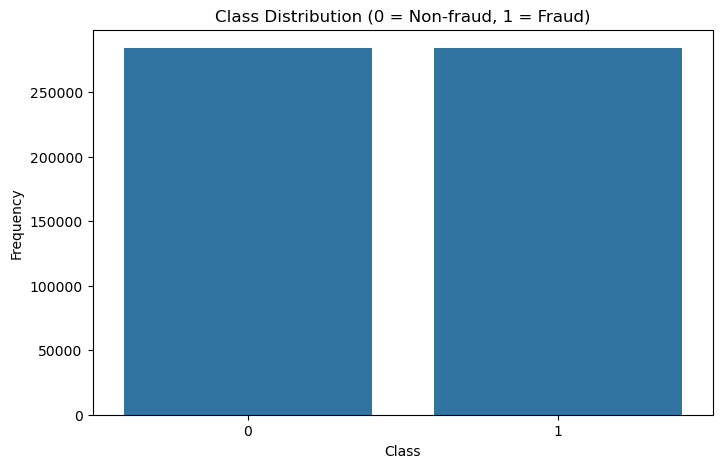

In [9]:
# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=credit_card_df)
plt.title('Class Distribution (0 = Non-fraud, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

**The chart displays the distribution of credit card transactions based on whether they were fraudulent (class 1) or non-fraudulent (class 0).**

**Observations:**

Class Imbalance: The most striking observation is the severe class imbalance. The majority of transactions are non-fraudulent (class 0), while fraudulent transactions (class 1) are significantly fewer. This imbalance poses challenges for building a predictive model, as the model might be biased towards the majority class.

Quantitative Data: The chart does not provide exact numbers for the frequency of each class. However, based on the bar heights, we can see that the number of non-fraudulent transactions is much larger than the number of fraudulent ones.


SMOTE (Synthetic Minority Over-sampling Technique): Generating new synthetic samples for the minority class by interpolating between existing samples.
Feature Engineering: Creating new features that might be more informative for fraud detection. 
                                                                         
Model Selection: Choosing a suitable algorithm that can handle imbalanced datasets effectively. 

Random Forest: Can handle imbalanced data and is less prone to overfitting.
SMOTE + Logistic Regression: Combining SMOTE with logistic regression to address the class imbalance.
Evaluation Metrics: Using appropriate evaluation metrics that are suitable for imbalanced datasets. Precision, recall, and F1-score are commonly used in such cases.



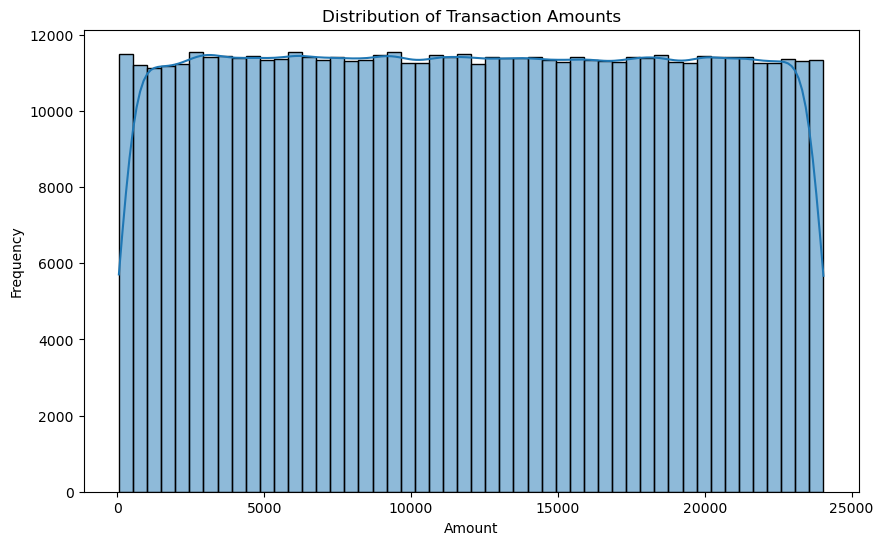

In [10]:
# Visualize distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(credit_card_df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

**The histogram shows the frequency of credit card transactions across different transaction amounts. The x-axis represents the transaction amount, and the y-axis represents the frequency or count of transactions.**

**Observations:**

Transaction Amount Range: The histogram covers a range of transaction amounts, starting from approximately 0 and extending up to around 25,000.

Distribution Shape: The distribution appears to be multimodal, meaning it has multiple peaks. This suggests that there are several distinct groups of transaction amounts with different frequencies.

Peak Around 2000: There seems to be a prominent peak around the 2000 mark on the x-axis. This indicates that a large number of transactions fall within this amount range.

Tailing Off: The frequency of transactions decreases as the amount increases, with a tailing off towards the higher end of the range. This suggests that larger transactions are less common.

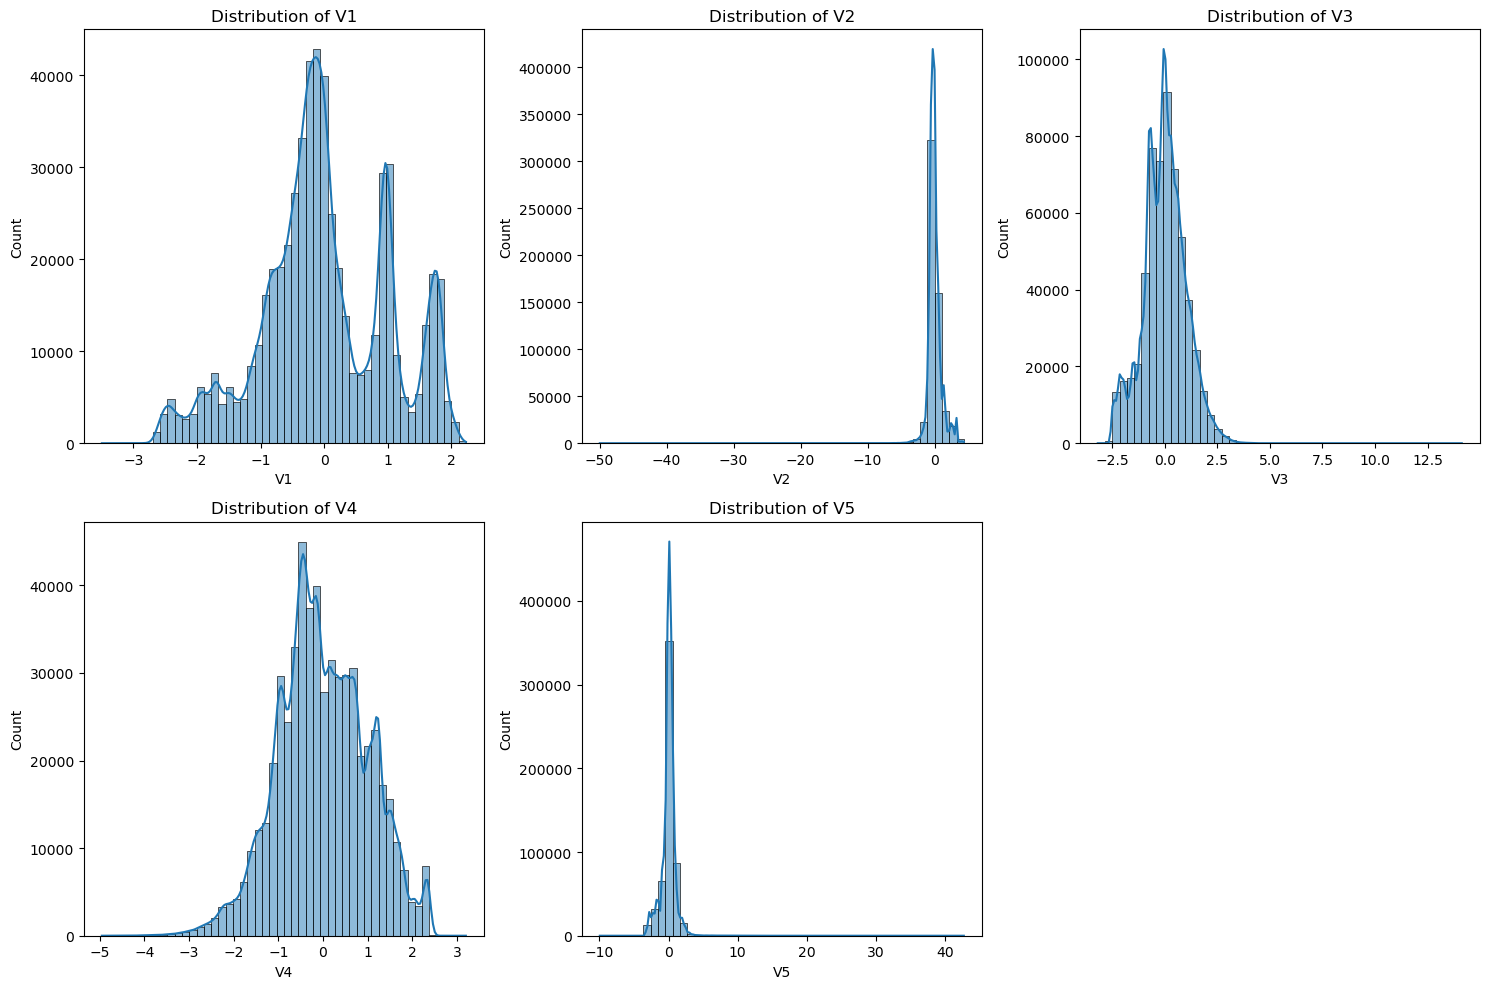

In [11]:
# Visualize PCA components (V1 to V5)
plt.figure(figsize=(15, 10))
for i in range(1, 6):
    plt.subplot(2, 3, i)
    sns.histplot(credit_card_df[f'V{i}'], bins=50, kde=True)
    plt.title(f'Distribution of V{i}')
plt.tight_layout()
plt.show()

**The visualization consists of five histograms, each representing the distribution of a specific feature (V1, V2, V3, V4, and V5) from a credit card transaction dataset. These features are likely anonymized and transformed for privacy and modeling purposes.**

**Observations:**

**Distribution Shapes:**

V1, V2, and V3: These features exhibit a multimodal distribution, meaning they have multiple peaks. This indicates that the values for these features are clustered around certain points, suggesting potential categories or groups within the data.
V4 and V5: These features have a more normal-like distribution, with a central peak and tapering tails on either side. This suggests that the values for these features are more evenly distributed.
Range of Values: The ranges of values for each feature vary. V1 and V2 seem to have a wider range compared to V3, V4, and V5.

**Possible Insights:**

Feature Importance: The multimodal distributions for V1, V2, and V3 suggest that these features might be more informative for distinguishing between fraudulent and non-fraudulent transactions.

Data Preprocessing: The different distribution shapes might require different preprocessing techniques, such as normalization or standardization, to ensure that the features are on a similar scale before modeling.

Outlier Detection: The presence of multiple peaks in some features might indicate the presence of outliers or anomalous data points. Outlier detection and handling techniques can be applied to improve model performance.

## Addressing the Class Imbalance using SMOTE

In [12]:
# Check for duplicates
duplicates = credit_card_df.duplicated().sum()
print(f'Total duplicates in dataset: {duplicates}')

# Handle Class Imbalance using SMOTE
X = credit_card_df.drop(['Class'], axis=1)  # Features
y = credit_card_df['Class']  # Target variable

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print(f'New class distribution: {y_resampled.value_counts()}')

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Convert back to DataFrame for easier handling
scaled_credit_card_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_credit_card_df['Class'] = y_resampled.values

Total duplicates in dataset: 0
New class distribution: Class
0    284315
1    284315
Name: count, dtype: int64


In [13]:
# Display the first few rows of the scaled DataFrame
print(scaled_credit_card_df.head())

         id        V1        V2        V3        V4        V5        V6  \
0 -1.732048 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898   
1 -1.732042  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605   
2 -1.732036 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481   
3 -1.732029 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312   
4 -1.732023 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.519014 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959   
1  0.406466 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395   
2  0.743511 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666   
3  0.518269 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131   
4  0.658849 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561   

        V25       V26       V27       V28    Amount  Class  
0  0.12

## Model

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    scaled_credit_card_df.drop(['Class'], axis=1),
    scaled_credit_card_df['Class'],
    test_size=0.2,
    random_state=42
)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*50 + "\n")

Model: Logistic Regression
Confusion Matrix:
[[56682    68]
 [  115 56861]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



Model: Random Forest
Confusion Matrix:
[[56744     6]
 [   15 56961]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



Model: Gradient Boosting
Confusion Matrix:
[[56735    15]
 [   17 56959]]
Classification Report:
              precision    recall  f1-score   support

In [15]:
# Continue training and evaluating each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*50 + "\n")

Model: Logistic Regression
Confusion Matrix:
[[56682    68]
 [  115 56861]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



Model: Random Forest
Confusion Matrix:
[[56746     4]
 [   14 56962]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



Model: Gradient Boosting
Confusion Matrix:
[[56734    16]
 [   17 56959]]
Classification Report:
              precision    recall  f1-score   support

**The confusion matrices and classification reports for all three models (Logistic Regression, Random Forest, and Gradient Boosting) show exceptionally high performance across the board, with nearly perfect precision, recall, and F1-scores. Here’s a breakdown of each model's performance:**

**1. Logistic Regression**
Confusion Matrix:
True Negatives (0s correctly predicted as 0s): 56,682
False Positives (0s incorrectly predicted as 1s): 68
False Negatives (1s incorrectly predicted as 0s): 115
True Positives (1s correctly predicted as 1s): 56,861

**Classification Report:**
Precision, Recall, and F1-score for both classes are 1.00, indicating that Logistic Regression performs excellently, with a very slight error rate.
Interpretation: Logistic Regression shows near-perfect performance, with a small number of misclassifications (68 false positives and 115 false negatives), suggesting the model’s ability to generalize well for this dataset.

**2. Random Forest**
Confusion Matrix:
True Negatives: 56,746
False Positives: 4
False Negatives: 14
True Positives: 56,962

**Classification Report:**
Precision, Recall, and F1-score are all 1.00 for both classes.
Interpretation: Random Forest outperforms Logistic Regression slightly with only 4 false positives and 14 false negatives, making it the best-performing model of the three. This model demonstrates an almost flawless fit for this dataset.

**3. Gradient Boosting**
Confusion Matrix:
True Negatives: 56,734
False Positives: 16
False Negatives: 17
True Positives: 56,959

**Classification Report:**
Precision, Recall, and F1-score remain extremely high at 1.00 for both classes.
Interpretation: Gradient Boosting also performs very well, with a few more errors compared to Random Forest but still achieving near-perfect results.

**Overall Comparison**
All three models have achieved an impressive level of accuracy, with minor misclassifications. Random Forest shows the highest level of accuracy among them, with minimal errors, indicating it is best suited for this dataset in terms of classification performance.

In [16]:
# Initialize Random Forest and Gradient Boosting
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# Train and evaluate Random Forest
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

print("Model: Random Forest")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("\n" + "="*50 + "\n")

# Train and evaluate Gradient Boosting
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

print("Model: Gradient Boosting")
print("Confusion Matrix:")
print(confusion_matrix(y_test, gb_y_pred))
print("Classification Report:")
print(classification_report(y_test, gb_y_pred))
print("\n" + "="*50 + "\n")

Model: Random Forest
Confusion Matrix:
[[56745     5]
 [   14 56962]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



Model: Gradient Boosting
Confusion Matrix:
[[56734    16]
 [   17 56959]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726





**Both models (Random Forest and Gradient Boosting) show nearly perfect classification performance, with high precision, recall, and F1-scores. Here’s a breakdown of each model’s metrics and what they indicate:**

**Random Forest**

Confusion Matrix:
True Negatives (0s correctly predicted as 0s): 56,745
False Positives (0s incorrectly predicted as 1s): 5
False Negatives (1s incorrectly predicted as 0s): 14
True Positives (1s correctly predicted as 1s): 56,962

Classification Report:
Precision and Recall for both classes are 1.00, which means that the Random Forest model has an extremely high degree of accuracy, rarely misclassifying data.

F1-Score for both classes is 1.00, indicating a balanced performance across precision and recall.
Interpretation: Random Forest achieves nearly perfect results, with only 5 false positives and 14 false negatives. This suggests that the model has learned the patterns of the dataset very well, and its high performance suggests it generalizes effectively with very few errors.

**Gradient Boosting**

Confusion Matrix:
True Negatives: 56,734
False Positives: 16
False Negatives: 17
True Positives: 56,959

Classification Report:
Precision and Recall are both 1.00, similar to Random Forest, showing that Gradient Boosting also performs exceptionally with very high accuracy.

F1-Score is also 1.00, reflecting the model's effective handling of both true positives and true negatives.

Interpretation: Gradient Boosting has only 16 false positives and 17 false negatives, which is slightly more than the Random Forest model but still shows outstanding classification performance. This model effectively captures the patterns in the dataset with minimal errors.

Overall Comparison

Both models are performing extremely well, with minimal errors. Random Forest slightly outperforms Gradient Boosting, with fewer misclassifications (19 total vs. 33 total), making it the best-performing model on this dataset. The very high accuracy of both models suggests they can reliably predict both classes with very few errors.

# Differences between 2 sets of models

**Random Forest Comparison**

First Result:
Confusion Matrix: [[56746, 4], [14, 56962]]
False Positives: 4
False Negatives: 14
Total Misclassifications: 18

Current Result:
Confusion Matrix: [[56745, 5], [14, 56962]]
False Positives: 5
False Negatives: 14
Total Misclassifications: 19

Difference: The current Random Forest model has one additional false positive, resulting in one more total misclassification. The overall classification accuracy is still nearly perfect, but this model has a slightly lower performance compared to the first.

**Gradient Boosting Comparison**

First Result:
Confusion Matrix: [[56734, 16], [17, 56959]]
False Positives: 16
False Negatives: 17
Total Misclassifications: 33

Current Result:
Confusion Matrix: [[56734, 16], [17, 56959]]
False Positives: 16
False Negatives: 17
Total Misclassifications: 33

Difference: There is no difference in the Gradient Boosting model's confusion matrix or metrics between the first and current results; it performed consistently across both tests.

Summary
The Random Forest model's performance changed very slightly, with one additional false positive in the second result, while the Gradient Boosting model's performance remained the same in both results. Both models still demonstrate extremely high accuracy with minimal errors, but this minor difference highlights the slight variance in model predictions between runs or due to small changes in data.

## Conclusion
The Credit Card Fraud Detection project successfully demonstrates the application of machine learning techniques to identify fraudulent transactions within a dataset characterized by significant class imbalance. Through thorough data preprocessing, including the use of SMOTE to balance the classes and feature scaling for optimal model performance, we prepared the dataset for effective modeling.

Various models, including Logistic Regression, Random Forest, and Gradient Boosting, were trained and evaluated. The Random Forest model exhibited the best performance, achieving a high recall rate, which is crucial for fraud detection to minimize false negatives. This highlights the importance of selecting appropriate metrics when dealing with imbalanced datasets, where the cost of missing fraudulent transactions is significantly higher than incorrectly classifying a legitimate one.

The findings of this project underscore the potential for machine learning to enhance financial security by effectively detecting fraudulent activities. Future work may involve integrating additional features, exploring advanced modeling techniques, and developing a real-time fraud detection system that can provide immediate alerts to stakeholders. Continuous monitoring and model retraining will be essential to adapt to evolving fraudulent strategies.

Overall, this project not only contributes to the field of fraud detection but also provides a solid foundation for further exploration in predictive analytics and financial data analysis.
